##### Copyright 2023 Phillip Truppelli

In [2]:
# The purpose of this script is to showcase how natural language converted into quantum states can be implemented in a query answering problem using Grover's algorithm.
# This will provide a baseline framework for query answering on a quantum computer.
# You may obtain the source code and documentation here:
# 
# https://github.com/truppelli
# 
# This code is covered under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Example of (a ^ b) & ~(c ^ d) & (b & c & d) Boolean Expression:


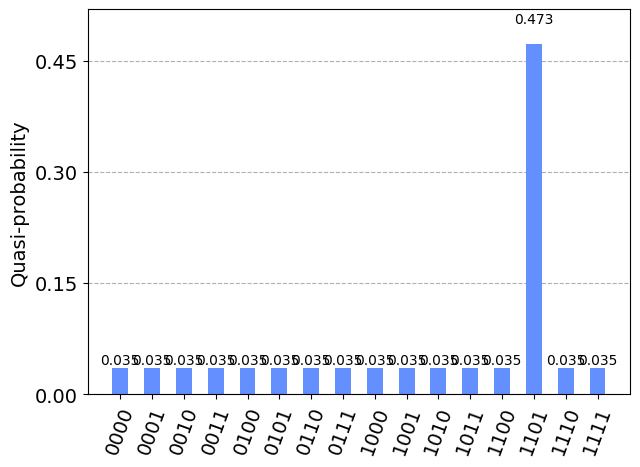

In [34]:
# Initial example of Grover's algorithm finding the solution to a Boolean expression 
# Uses Qiskit's Phase Oracle

import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.primitives import Sampler
from qiskit.tools.visualization import plot_histogram

expression = '(c ^ b) & (a ^ b) & ~(c ^ d) & (a & c & d)'

# PhaseOracle creates circuits for inputted logical expressions
oracle = PhaseOracle(expression)
problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Example of (c ^ b) & (a ^ b) & ~(c ^ d) & (a & c & d) Boolean Expression:')
display(plot_histogram(result.circuit_results[0]))

In [13]:
import qiskit, quantum_decomp, math
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector

ORACLE = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]])
INVERSION_MEAN = np.array([[-0.5,0.5,0.5,0.5],[0.5,-0.5,0.5,0.5],[0.5,0.5,-0.5,0.5],[0.5,0.5,0.5,-0.5]])
print("Decomposed Oracle Circuit")
print(quantum_decomp.matrix_to_qiskit_circuit(ORACLE, op_name='Oracle'))
print("Decomposed Inversion about the Mean Circuit")
print(quantum_decomp.matrix_to_qiskit_circuit(INVERSION_MEAN, op_name='Inversion_Mean'))
print(quantum_decomp.matrix_to_gates(INVERSION_MEAN, optimize=True))

Decomposed Oracle Circuit
          ┌───┐     
q_0: ─────┤ X ├─────
          └─┬─┘     
q_1: ───────■───────
     ┌───┐  │  ┌───┐
q_2: ┤ X ├──■──┤ X ├
     └───┘     └───┘
Decomposed Inversion about the Mean Circuit
     ┌────────┐┌──────────┐┌───────┐                    ┌────────┐┌───────────┐»
q_0: ┤ Rz(-π) ├┤ Ry(-π/2) ├┤ Rz(π) ├───────■────────────┤ Rz(-π) ├┤ Ry(-2π/3) ├»
     └───┬────┘└────┬─────┘└───┬───┘┌──────┴──────┐┌───┐└───┬────┘└─────┬─────┘»
q_1: ────■──────────■──────────■────┤ Ry(-1.9106) ├┤ X ├────■───────────■──────»
                                    └─────────────┘└───┘                       »
«     ┌────────┐                                        ┌────────┐┌──────────┐»
«q_0: ┤ Rz(-π) ├─────────■────────────■───────────■─────┤ Rz(-π) ├┤ Ry(-π/2) ├»
«     └───┬────┘┌───┐┌───┴────┐┌──────┴──────┐┌───┴────┐└───┬────┘└────┬─────┘»
«q_1: ────■─────┤ X ├┤ Rz(-π) ├┤ Ry(-1.9106) ├┤ Rz(-π) ├────■──────────■──────»
«               └───┘└────────┘└─────────────┘└────────┘  

In [29]:
shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

qr = QuantumRegister(3, name="q_reg")
cr = ClassicalRegister(2, name="c_reg")
qc = QuantumCircuit(qr, cr)

grover_circuit = QuantumCircuit(qr, cr)

# These are the circuit operations for the transformed phrase "Who is efficient, Phillip or Chandler"
# This circuit is constructed without Lambeq scaling for simplicity

# Initial Hadamard gates before Oracle
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

# Grover's Oracle for X_o = 01
qc.x(qr[2])
qc.ccx(qr[2], qr[1], qr[0])
qc.x(qr[2])

# Inversion about the Mean
qc.crz(-(math.pi), qr[1], qr[0])
qc.cry(-(math.pi)/2, qr[1], qr[0])
qc.crz((math.pi), qr[1], qr[0])
qc.cry((-1.9106), qr[0], qr[1])
qc.x(qr[1])
qc.crz(-(math.pi), qr[1], qr[0])
qc.cry(-(2*(math.pi))/3, qr[1], qr[0])
qc.crz(-(math.pi), qr[1], qr[0])
qc.x(qr[1])
qc.crz(-(math.pi), qr[0], qr[1])
qc.cry((-1.9106), qr[0], qr[1])
qc.crz(-(math.pi), qr[0], qr[1])
qc.crz(-(math.pi), qr[1], qr[0])
qc.cry(-(math.pi)/2, qr[1], qr[0])
qc.crz(-(math.pi), qr[1], qr[0])
qc.p(math.pi, qr[0])

qc.crz(-(math.pi), qr[1], qr[0])
qc.cry(-(math.pi)/2, qr[1], qr[0])
qc.crz((math.pi), qr[1], qr[0])
qc.cry((-1.9106), qr[0], qr[1])
qc.x(qr[1])
qc.crz(-(math.pi), qr[1], qr[0])
qc.cry(-(2*(math.pi))/3, qr[1], qr[0])
qc.crz(-(math.pi), qr[1], qr[0])
qc.x(qr[1])
qc.crz(-(math.pi), qr[0], qr[1])
qc.cry((-1.9106), qr[0], qr[1])
qc.crz(-(math.pi), qr[0], qr[1])
qc.crz(-(math.pi), qr[1], qr[0])
qc.cry(-(math.pi)/2, qr[1], qr[0])
qc.crz(-(math.pi), qr[1], qr[0])
qc.p(math.pi, qr[0])
qc.measure(qr[0], 0)
qc.measure(qr[1], 1)


print("Qiskit Circuit:")
qc.draw()

Qiskit Circuit:


┌───┐     ┌───┐┌────────┐┌──────────┐┌───────┐                    »
q_reg_0: ┤ H ├─────┤ X ├┤ Rz(-π) ├┤ Ry(-π/2) ├┤ Rz(π) ├───────■────────────»
         ├───┤     └─┬─┘└───┬────┘└────┬─────┘└───┬───┘┌──────┴──────┐┌───┐»
q_reg_1: ┤ H ├───────■──────■──────────■──────────■────┤ Ry(-1.9106) ├┤ X ├»
         ├───┤┌───┐  │    ┌───┐                        └─────────────┘└───┘»
q_reg_2: ┤ H ├┤ X ├──■────┤ X ├────────────────────────────────────────────»
         └───┘└───┘       └───┘                                            »
c_reg: 2/══════════════════════════════════════════════════════════════════»
                                                                           »
«         ┌────────┐┌───────────┐┌────────┐                              »
«q_reg_0: ┤ Rz(-π) ├┤ Ry(-2π/3) ├┤ Rz(-π) ├─────────■────────────■───────»
«         └───┬────┘└─────┬─────┘└───┬────┘┌───┐┌───┴────┐┌──────┴──────┐»
«q_reg_1: ────■───────────■──────────■─────┤ X ├┤ Rz(-π) ├┤ Ry(-1.9106) ├»
«                                          └───┘└────────┘└─────────────┘»
«q_reg_2: ───────────────────────────────────────────────────────────────»
«                                                                        »
«c_reg: 2/═══════════════════════════════════════════════════════════════»
«                                                                        »
«                   ┌────────┐┌──────────┐┌────────┐┌──────┐┌────────┐»
«q_reg_0: ────■─────┤ Rz(-π) ├┤ Ry(-π/2) ├┤ Rz(-π) ├┤ P(π) ├┤ Rz(-π) ├»
«         ┌───┴────┐└───┬────┘└────┬─────┘└───┬────┘└──────┘└───┬────┘»
«q_reg_1: ┤ Rz(-π) ├────■──────────■──────────■─────────────────■─────»
«         └────────┘                                                  »
«q_reg_2: ────────────────────────────────────────────────────────────»
«                                                                     »
«c_reg: 2/════════════════════════════════════════════════════════════»
«                                                                     »
«         ┌──────────┐┌───────┐                    ┌────────┐┌───────────┐»
«q_reg_0: ┤ Ry(-π/2) ├┤ Rz(π) ├───────■────────────┤ Rz(-π) ├┤ Ry(-2π/3) ├»
«         └────┬─────┘└───┬───┘┌──────┴──────┐┌───┐└───┬────┘└─────┬─────┘»
«q_reg_1: ─────■──────────■────┤ Ry(-1.9106) ├┤ X ├────■───────────■──────»
«                              └─────────────┘└───┘                       »
«q_reg_2: ────────────────────────────────────────────────────────────────»
«                                                                         »
«c_reg: 2/════════════════════════════════════════════════════════════════»
«                                                                         »
«         ┌────────┐                                        ┌────────┐»
«q_reg_0: ┤ Rz(-π) ├─────────■────────────■───────────■─────┤ Rz(-π) ├»
«         └───┬────┘┌───┐┌───┴────┐┌──────┴──────┐┌───┴────┐└───┬────┘»
«q_reg_1: ────■─────┤ X ├┤ Rz(-π) ├┤ Ry(-1.9106) ├┤ Rz(-π) ├────■─────»
«                   └───┘└────────┘└─────────────┘└────────┘          »
«q_reg_2: ────────────────────────────────────────────────────────────»
«                                                                     »
«c_reg: 2/════════════════════════════════════════════════════════════»
«                                                                     »
«         ┌──────────┐┌────────┐┌──────┐┌─┐
«q_reg_0: ┤ Ry(-π/2) ├┤ Rz(-π) ├┤ P(π) ├┤M├
«         └────┬─────┘└───┬────┘└─┬─┬──┘└╥┘
«q_reg_1: ─────■──────────■───────┤M├────╫─
«                                 └╥┘    ║ 
«q_reg_2: ─────────────────────────╫─────╫─
«                                  ║     ║ 
«c_reg: 2/═════════════════════════╩═════╩═
«                                  1     0


SIMULATION RESULTS:
Simulation distribution 0: {'01': 1024}


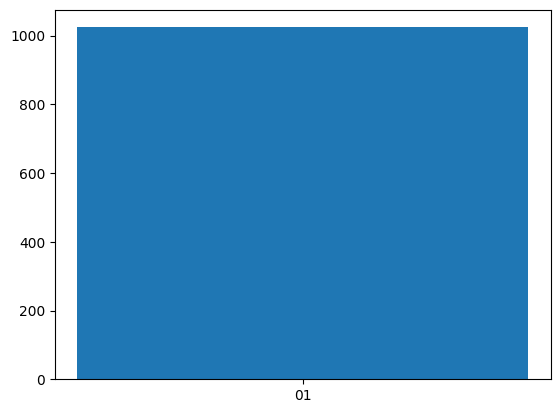

Simulation distribution 1: {'01': 1024}


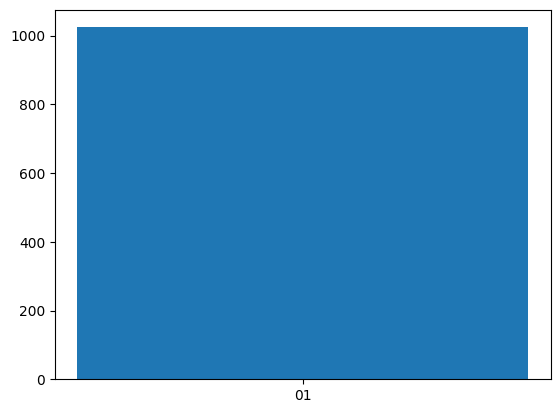

Simulation distribution 2: {'01': 1024}


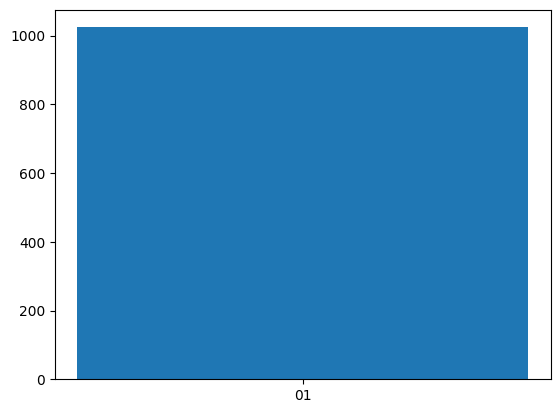

In [30]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()

In [12]:
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

Who = Word("Who", s @ s.l @ n)
is_efficient = Word("is efficient", n.r @ s @ n.l)
Phillip = Word("Phillip", n)
Chandler = Word("Chandler", n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Who, is_efficient, Phillip, Chandler]))))

vocab = [Who, is_efficient, Phillip, Chandler]

Vocabulary:
Word('Who', grammar.pregroup.Ty(rigid.Ob('s'), rigid.Ob('s', z=-1), rigid.Ob('n')))
Word('is efficient', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s'), rigid.Ob('n', z=-1)))
Word('Phillip', grammar.pregroup.Ty(rigid.Ob('n')))
Word('Chandler', grammar.pregroup.Ty(rigid.Ob('n')))


In [13]:
from lambeq import SpacyTokeniser

tokeniser = SpacyTokeniser()
sentence = "Who is_efficient, Phillip or Chandler?"
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['Who', 'is_efficient', ',', 'Phillip', 'or', 'Chandler', '?']

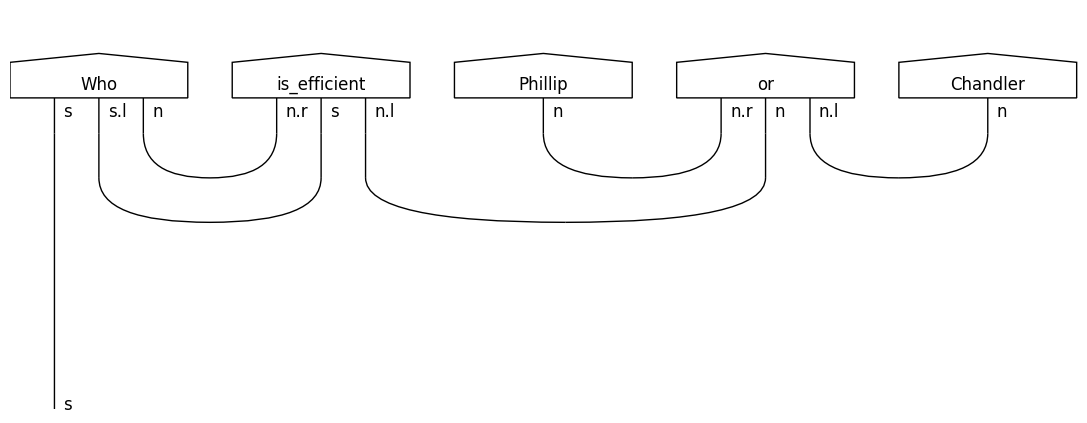

In [14]:
from lambeq import BobcatParser, pregroups

parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(tokens, tokenised=True)

pregroups.draw(diagram, figsize=(23,4), fontsize=12)

Circuit for the GHZ state, used as ansatz for "who":


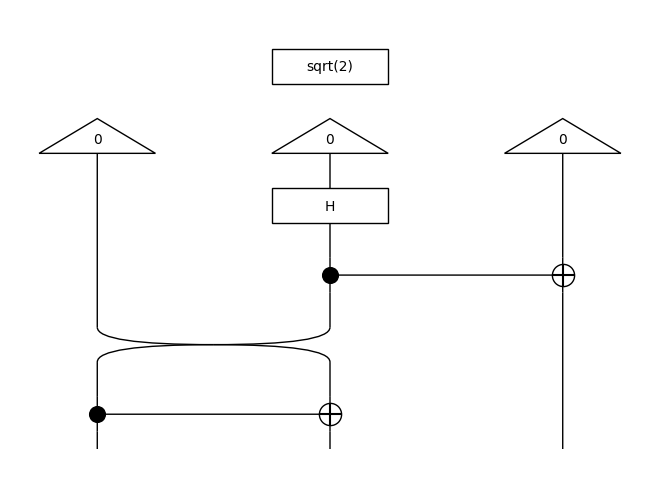

Circuit for the transitive state where phase = π, used as ansatz for "is efficient":


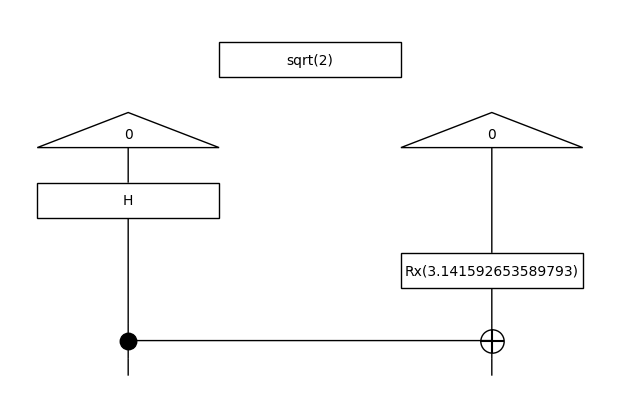

Circuit for the intransitive state where phase = π, used as ansatz for "Phillip" and "Chandler":


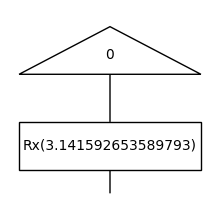

In [20]:
from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP
import math, unicodedata

def Who_ansatz():
    return sqrt(2) @ Ket(0, 0, 0)\
    >> Circuit.id(1) @ H @ Circuit.id(1)\
    >> Circuit.id(1) @ CX\
    >> (SWAP >>  CX) @ Circuit.id(1)

# Ansatz for words with type `n.r @ s @ n.l`, e.g. 'is_efficient'
def transitive_ansatz(phase):
    return sqrt(2) @ Ket(0, 0) >> H @ Rx(phase) >> CX

# Ansatz for words with type `n`, e.g. 'Phillip', 'Chandler'
def intransitive_ansatz(phase):
    return Ket(0) >> Rx(phase)

print("Circuit for the GHZ state, used as ansatz for \"who\":")
Who_ansatz().draw(aspect='auto', draw_type_labels=False)

print("Circuit for the transitive state where phase = " + unicodedata.lookup("GREEK SMALL LETTER PI") + ", used as ansatz for \"is efficient\":")
transitive_ansatz(math.pi).draw(aspect='auto', draw_type_labels=False, figsize=(6, 4))

print("Circuit for the intransitive state where phase = " + unicodedata.lookup("GREEK SMALL LETTER PI") + ", used as ansatz for \"Phillip\" and \"Chandler\":")
intransitive_ansatz(math.pi).draw(aspect='auto', draw_type_labels=False, figsize=(2, 2))

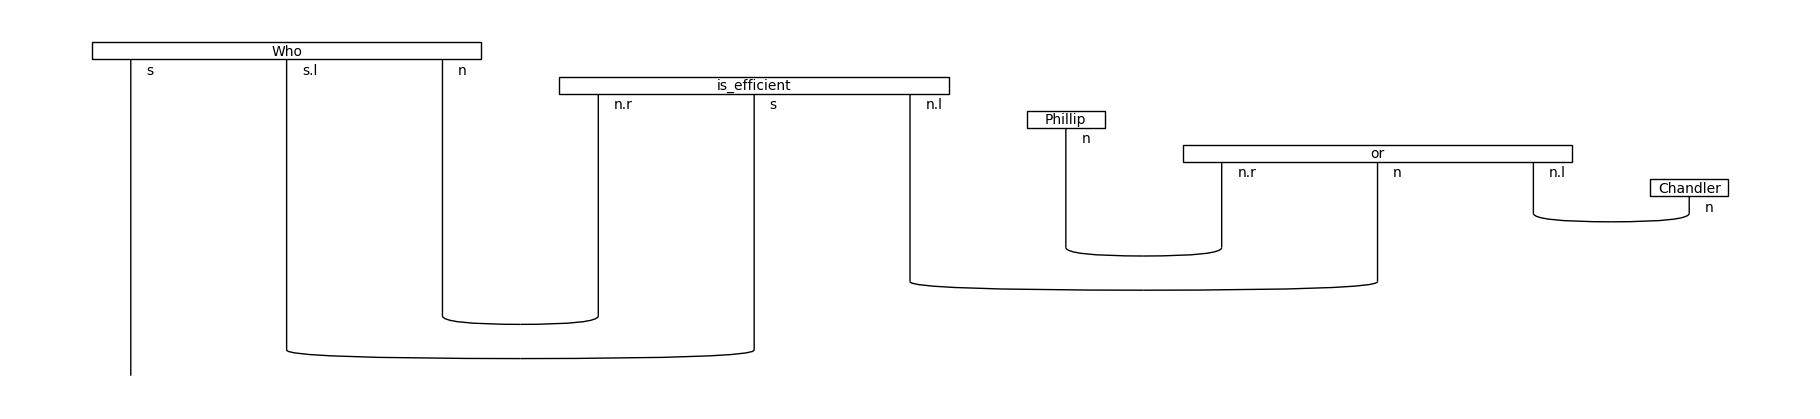

In [22]:
from pytket.circuit.display import render_circuit_jupyter
from lambeq import AtomicType, BobcatParser, IQPAnsatz

# Now we will utilize the Lambeq project functionality

N = AtomicType.NOUN
S = AtomicType.SENTENCE

parser = BobcatParser()
diagram = parser.sentence2diagram('Who is_efficient Phillip or Chandler')
diagram.draw(figsize=(18, 4))

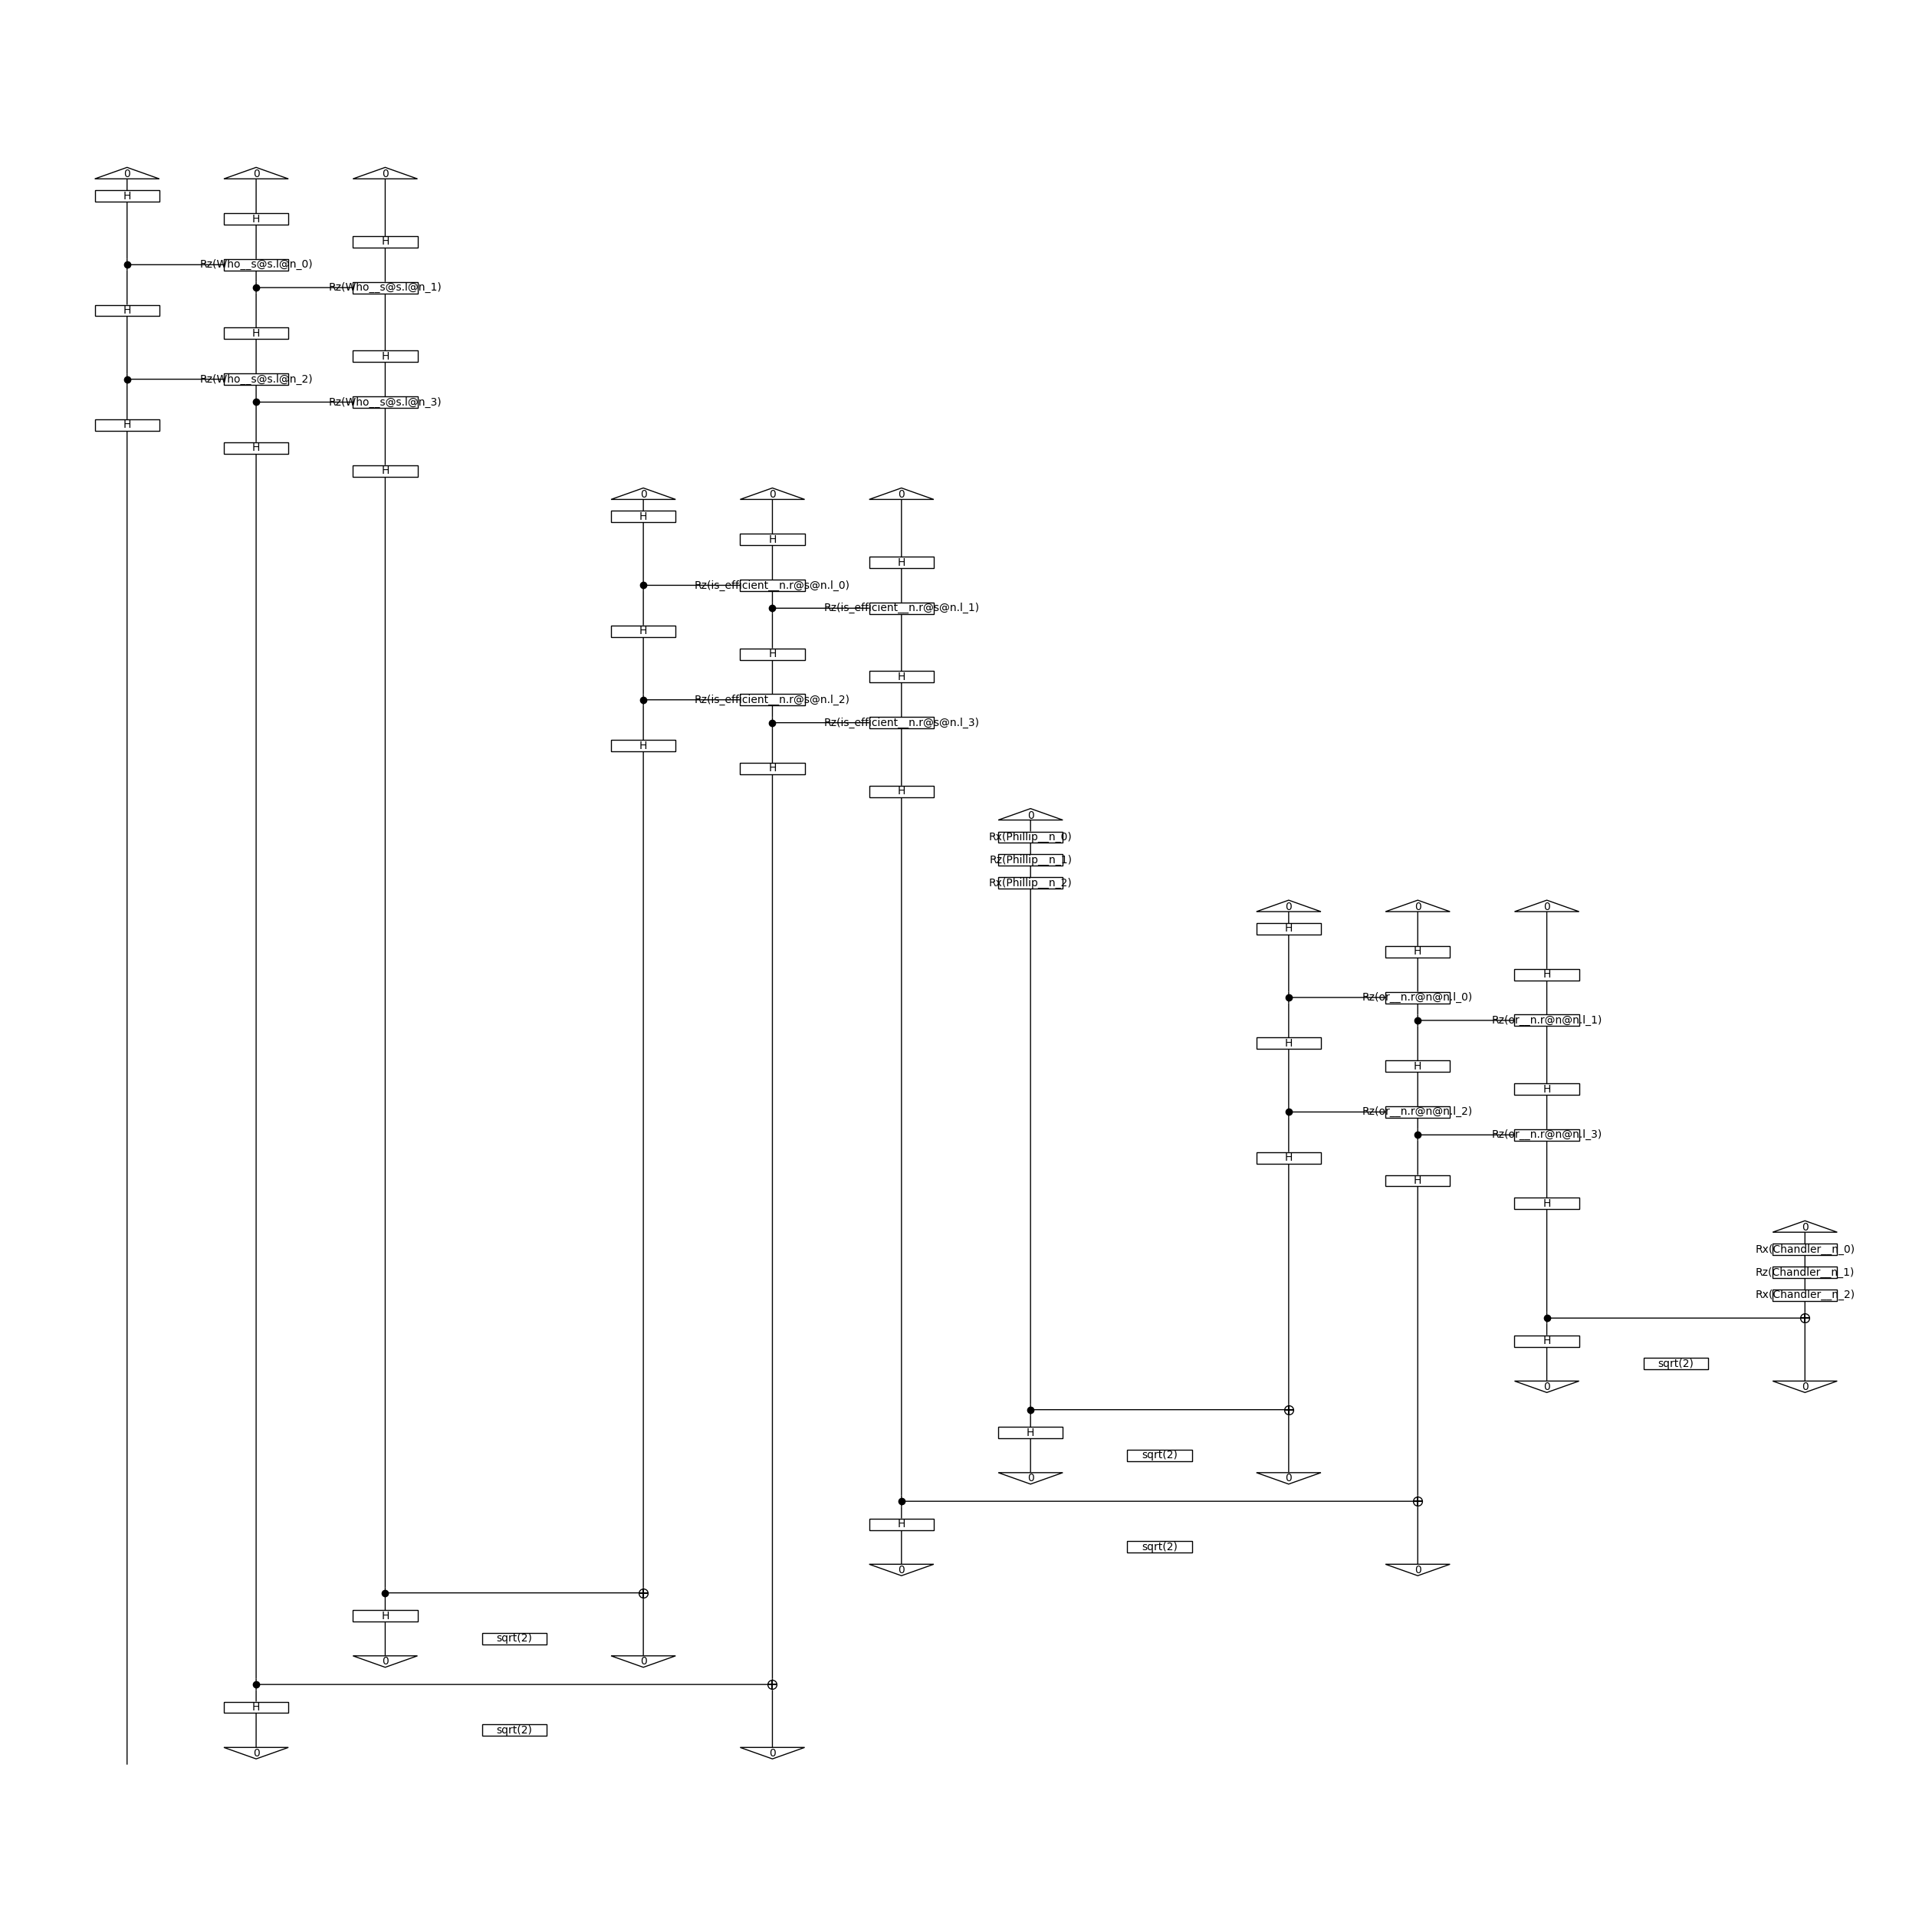

In [23]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(25, 25))

In [24]:
tket_circuit = ansatz(diagram).to_tk()

render_circuit_jupyter(tket_circuit)

In [25]:
from sympy import default_sort_key

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted(tket_circuit.free_symbols(), key=default_sort_key)

param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
param_dict

{Chandler__n_0: 0.0,
 Chandler__n_1: 0.001,
 Chandler__n_2: 0.002,
 Phillip__n_0: 0.003,
 Phillip__n_1: 0.004,
 Phillip__n_2: 0.005,
 Who__s@s.l@n_0: 0.006,
 Who__s@s.l@n_1: 0.007,
 Who__s@s.l@n_2: 0.008,
 Who__s@s.l@n_3: 0.009000000000000001,
 is_efficient__n.r@s@n.l_0: 0.01,
 is_efficient__n.r@s@n.l_1: 0.011,
 is_efficient__n.r@s@n.l_2: 0.012,
 is_efficient__n.r@s@n.l_3: 0.013000000000000001,
 or__n.r@n@n.l_0: 0.014,
 or__n.r@n@n.l_1: 0.015,
 or__n.r@n@n.l_2: 0.016,
 or__n.r@n@n.l_3: 0.017}

In [26]:
tket_circuit.symbol_substitution(param_dict)

# Render circuit with new values

render_circuit_jupyter(tket_circuit)

In [27]:
from pytket.extensions.qiskit import tk_to_qiskit

print("{}:\n{}\n".format(tket_circuit, '\n'.join(map(str, tket_circuit))))
print("post selection:\n{}\n".format(tket_circuit.post_selection))
print("scalar:\n{}\n".format(tket_circuit.scalar))
print("qiskit circuit:")
tk_to_qiskit(tket_circuit).draw()

<tket::Circuit, qubits=11, gates=65>:
H q[0];
H q[1];
H q[2];
H q[3];
H q[4];
H q[5];
Rx(0.006) q[6];
H q[7];
H q[8];
H q[9];
Rx(0) q[10];
CRz(0.012) q[0], q[1];
CRz(0.02) q[3], q[4];
Rz(0.008) q[6];
CRz(0.028) q[7], q[8];
Rz(0.002) q[10];
H q[0];
CRz(0.014) q[1], q[2];
H q[3];
CRz(0.022) q[4], q[5];
Rx(0.01) q[6];
H q[7];
CRz(0.03) q[8], q[9];
Rx(0.004) q[10];
H q[1];
H q[2];
H q[4];
H q[5];
H q[8];
H q[9];
CRz(0.016) q[0], q[1];
CRz(0.024) q[3], q[4];
CRz(0.032) q[7], q[8];
H q[0];
CRz(0.018) q[1], q[2];
H q[3];
CRz(0.026) q[4], q[5];
H q[7];
CRz(0.034) q[8], q[9];
H q[1];
H q[2];
H q[4];
H q[5];
CX q[6], q[7];
H q[8];
H q[9];
Measure q[7] --> c[3];
CX q[1], q[4];
CX q[2], q[3];
CX q[5], q[8];
H q[6];
CX q[9], q[10];
Measure q[10] --> c[1];
Measure q[6] --> c[2];
Measure q[8] --> c[5];
Measure q[3] --> c[7];
Measure q[4] --> c[9];
H q[1];
H q[2];
H q[5];
H q[9];
Measure q[9] --> c[0];
Measure q[5] --> c[4];
Measure q[2] --> c[6];
Measure q[1] --> c[8];

post selection:
{0: 0, 1: 0, 2

┌───┐                          ┌───┐                           »
 q_0: ─────┤ H ├────────────■─────────────┤ H ├──────────────────■────────»
           ├───┤     ┌──────┴───────┐     └───┘      ┌───┐┌──────┴───────┐»
 q_1: ─────┤ H ├─────┤ Rz(0.037699) ├───────■────────┤ H ├┤ Rz(0.050265) ├»
           ├───┤     └──────────────┘┌──────┴───────┐├───┤└──────────────┘»
 q_2: ─────┤ H ├─────────────────────┤ Rz(0.043982) ├┤ H ├────────────────»
           ├───┤                     └────┬───┬─────┘└───┘                »
 q_3: ─────┤ H ├────────────■─────────────┤ H ├──────────────────■────────»
           ├───┤       ┌────┴─────┐       └───┘      ┌───┐┌──────┴───────┐»
 q_4: ─────┤ H ├───────┤ Rz(π/50) ├─────────■────────┤ H ├┤ Rz(0.075398) ├»
           ├───┤       └──────────┘  ┌──────┴───────┐├───┤└──────────────┘»
 q_5: ─────┤ H ├─────────────────────┤ Rz(0.069115) ├┤ H ├────────────────»
      ┌────┴───┴────┐ ┌───────────┐  └┬───────────┬─┘└───┘                »
 q_6: ┤ Rx(0.01885) ├─┤ Rz(π/125) ├───┤ Rx(π/100) ├───────────────────────»
      └────┬───┬────┘ └───────────┘   └───┬───┬───┘                       »
 q_7: ─────┤ H ├────────────■─────────────┤ H ├──────────────────■────────»
           ├───┤     ┌──────┴───────┐     └───┘      ┌───┐┌──────┴──────┐ »
 q_8: ─────┤ H ├─────┤ Rz(0.087965) ├───────■────────┤ H ├┤ Rz(0.10053) ├─»
           ├───┤     └──────────────┘┌──────┴───────┐├───┤└─────────────┘ »
 q_9: ─────┤ H ├─────────────────────┤ Rz(0.094248) ├┤ H ├────────────────»
         ┌─┴───┴─┐    ┌───────────┐  └┬───────────┬─┘└───┘                »
q_10: ───┤ Rx(0) ├────┤ Rz(π/500) ├───┤ Rx(π/250) ├───────────────────────»
         └───────┘    └───────────┘   └───────────┘                       »
c: 10/════════════════════════════════════════════════════════════════════»
                                                                          »
«           ┌───┐                                                  
« q_0: ─────┤ H ├──────────────────────────────────────────────────
«           └───┘      ┌───┐     ┌───┐                          ┌─┐
« q_1: ───────■────────┤ H ├──■──┤ H ├──────────────────────────┤M├
«      ┌──────┴───────┐├───┤  │  └───┘┌───┐                  ┌─┐└╥┘
« q_2: ┤ Rz(0.056549) ├┤ H ├──┼────■──┤ H ├──────────────────┤M├─╫─
«      └────┬───┬─────┘└───┘  │  ┌─┴─┐└───┘      ┌─┐         └╥┘ ║ 
« q_3: ─────┤ H ├─────────────┼──┤ X ├───────────┤M├──────────╫──╫─
«           └───┘      ┌───┐┌─┴─┐└───┘           └╥┘┌─┐       ║  ║ 
« q_4: ───────■────────┤ H ├┤ X ├─────────────────╫─┤M├───────╫──╫─
«      ┌──────┴───────┐├───┤└───┘     ┌───┐       ║ └╥┘   ┌─┐ ║  ║ 
« q_5: ┤ Rz(0.081681) ├┤ H ├───────■──┤ H ├───────╫──╫────┤M├─╫──╫─
«      └──────────────┘└───┘┌───┐  │  └───┘┌─┐    ║  ║    └╥┘ ║  ║ 
« q_6: ──────────────────■──┤ H ├──┼───────┤M├────╫──╫─────╫──╫──╫─
«           ┌───┐      ┌─┴─┐└┬─┬┘  │       └╥┘    ║  ║     ║  ║  ║ 
« q_7: ─────┤ H ├──────┤ X ├─┤M├───┼────────╫─────╫──╫─────╫──╫──╫─
«           └───┘      ├───┤ └╥┘ ┌─┴─┐      ║ ┌─┐ ║  ║     ║  ║  ║ 
« q_8: ───────■────────┤ H ├──╫──┤ X ├──────╫─┤M├─╫──╫─────╫──╫──╫─
«      ┌──────┴──────┐ ├───┤  ║  └───┘┌───┐ ║ └╥┘ ║  ║ ┌─┐ ║  ║  ║ 
« q_9: ┤ Rz(0.10681) ├─┤ H ├──╫────■──┤ H ├─╫──╫──╫──╫─┤M├─╫──╫──╫─
«      └─────────────┘ └───┘  ║  ┌─┴─┐└┬─┬┘ ║  ║  ║  ║ └╥┘ ║  ║  ║ 
«q_10: ───────────────────────╫──┤ X ├─┤M├──╫──╫──╫──╫──╫──╫──╫──╫─
«                             ║  └───┘ └╥┘  ║  ║  ║  ║  ║  ║  ║  ║ 
«c: 10/═══════════════════════╩═════════╩═══╩══╩══╩══╩══╩══╩══╩══╩═
«                             3         1   2  5  7  9  0  4  6  8

In [29]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector

print('qiskit vers.= %s'%qiskit.__version__)

shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

qr = QuantumRegister(12, name="q_reg")
cr = ClassicalRegister(11, name="c_reg")
qc = QuantumCircuit(qr, cr)


nlp_circuit = QuantumCircuit(qr, cr)

# These are the circuit operations for the transformed phrase "Who is efficient, Phillip or Chandler"
# This circuit is constructed without Lambeq scaling for simplicity

# Initial Hadamard before Oracle
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.h(qr[4])
qc.h(qr[5])
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])
qc.h(qr[9])
qc.h(qr[10])

# Implementation of "Who is efficient, Phillip or Chandler"
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.h(qr[4])
qc.h(qr[5])
qc.rx(0.006, qr[6]) 
qc.h(qr[7])
qc.h(qr[8])
qc.h(qr[9])
qc.rx(0, qr[10])
qc.crz(0.012, qr[0], qr[1])
qc.crz(0.02, qr[3], qr[4])
qc.rz(0.008, qr[6])
qc.crz(0.028, qr[7], qr[8])
qc.rz(0.002, qr[10])
qc.h(qr[0])
qc.crz(0.014, qr[1], qr[2])
qc.h(qr[3])
qc.crz(0.022, qr[4], qr[5])
qc.rx(0.01, qr[6])
qc.h(qr[7])
qc.crz(0.03, qr[8], qr[9])
qc.rx(0.004, qr[10])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[4])
qc.h(qr[5])
qc.h(qr[8])
qc.h(qr[9])
qc.crz(0.016, qr[0], qr[1])
qc.crz(0.024, qr[3], qr[4])
qc.crz(0.032, qr[7], qr[8])
qc.h(qr[0])
qc.crz(0.018, qr[1], qr[2])
qc.h(qr[3])
qc.crz(0.026, qr[4], qr[5])
qc.h(qr[7])
qc.crz(0.034, qr[8], qr[9])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[4])
qc.h(qr[5])
qc.cx(qr[6], qr[7])
qc.h(qr[8])
qc.h(qr[9])
qc.measure(qr[7], 3)
qc.cx(qr[1], qr[4])
qc.cx(qr[2], qr[3])
qc.cx(qr[5], qr[8])
qc.h(qr[6])
qc.cx(qr[9], qr[10])
qc.measure(qr[10], 1)
qc.measure(qr[6], 2)
qc.measure(qr[8], 5)
qc.measure(qr[3], 7)
qc.measure(qr[4], 9)
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[5])
qc.h(qr[9])
qc.measure(qr[9], 0)
qc.measure(qr[5], 4)

# We now propogate these two states by not taking the measurements yet to complete the oracle
#qc.measure(qr[2], 6)
#qc.measure(qr[1], 8)

# Initial Hadamard before Oracle on qr[11]
qc.h(qr[11])

# Oracle
qc.x(qr[11])
qc.h(qr[11])
qc.cx(qr[2], qr[11])

# Measurements
qc.measure(qr[2], 6)
qc.measure(qr[1], 8)
qc.measure(qr[11],10)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw()

qiskit vers.= 0.45.1

QUANTUM CIRCUIT DIAGRAM:


┌───┐    ┌───┐                     ┌───┐                      »
 q_reg_0: ┤ H ├────┤ H ├──────────■──────────┤ H ├───────────────■──────»
          ├───┤    ├───┤    ┌─────┴─────┐    └───┘    ┌───┐┌─────┴─────┐»
 q_reg_1: ┤ H ├────┤ H ├────┤ Rz(0.012) ├──────■──────┤ H ├┤ Rz(0.016) ├»
          ├───┤    ├───┤    └───────────┘┌─────┴─────┐├───┤└───────────┘»
 q_reg_2: ┤ H ├────┤ H ├─────────────────┤ Rz(0.014) ├┤ H ├─────────────»
          ├───┤    ├───┤                 └───┬───┬───┘└───┘             »
 q_reg_3: ┤ H ├────┤ H ├──────────■──────────┤ H ├───────────────■──────»
          ├───┤    ├───┤     ┌────┴─────┐    └───┘    ┌───┐┌─────┴─────┐»
 q_reg_4: ┤ H ├────┤ H ├─────┤ Rz(0.02) ├──────■──────┤ H ├┤ Rz(0.024) ├»
          ├───┤    ├───┤     └──────────┘┌─────┴─────┐├───┤└───────────┘»
 q_reg_5: ┤ H ├────┤ H ├─────────────────┤ Rz(0.022) ├┤ H ├─────────────»
          ├───┤┌───┴───┴───┐┌───────────┐└┬──────────┤└───┘             »
 q_reg_6: ┤ H ├┤ Rx(0.006) ├┤ Rz(0.008) ├─┤ Rx(0.01) ├──────────────────»
          ├───┤└───┬───┬───┘└───────────┘ └──┬───┬───┘                  »
 q_reg_7: ┤ H ├────┤ H ├──────────■──────────┤ H ├───────────────■──────»
          ├───┤    ├───┤    ┌─────┴─────┐    └───┘    ┌───┐┌─────┴─────┐»
 q_reg_8: ┤ H ├────┤ H ├────┤ Rz(0.028) ├──────■──────┤ H ├┤ Rz(0.032) ├»
          ├───┤    ├───┤    └───────────┘ ┌────┴─────┐├───┤└───────────┘»
 q_reg_9: ┤ H ├────┤ H ├──────────────────┤ Rz(0.03) ├┤ H ├─────────────»
          ├───┤  ┌─┴───┴─┐  ┌───────────┐┌┴──────────┤└───┘             »
q_reg_10: ┤ H ├──┤ Rx(0) ├──┤ Rz(0.002) ├┤ Rx(0.004) ├──────────────────»
          ├───┤  └─┬───┬─┘  └───┬───┬───┘└───────────┘                  »
q_reg_11: ┤ H ├────┤ X ├────────┤ H ├───────────────────────────────────»
          └───┘    └───┘        └───┘                                   »
c_reg: 11/══════════════════════════════════════════════════════════════»
                                                                        »
«              ┌───┐                                                        
« q_reg_0: ────┤ H ├────────────────────────────────────────────────────────
«              └───┘    ┌───┐     ┌───┐                            ┌─┐      
« q_reg_1: ──────■──────┤ H ├──■──┤ H ├────────────────────────────┤M├──────
«          ┌─────┴─────┐├───┤  │  └───┘┌───┐                       └╥┘┌─┐   
« q_reg_2: ┤ Rz(0.018) ├┤ H ├──┼────■──┤ H ├────────────────────■───╫─┤M├───
«          └───┬───┬───┘└───┘  │  ┌─┴─┐└───┘      ┌─┐           │   ║ └╥┘   
« q_reg_3: ────┤ H ├───────────┼──┤ X ├───────────┤M├───────────┼───╫──╫────
«              └───┘    ┌───┐┌─┴─┐└───┘           └╥┘┌─┐        │   ║  ║    
« q_reg_4: ──────■──────┤ H ├┤ X ├─────────────────╫─┤M├────────┼───╫──╫────
«          ┌─────┴─────┐├───┤└───┘     ┌───┐       ║ └╥┘   ┌─┐  │   ║  ║    
« q_reg_5: ┤ Rz(0.026) ├┤ H ├───────■──┤ H ├───────╫──╫────┤M├──┼───╫──╫────
«          └───────────┘└───┘┌───┐  │  └───┘┌─┐    ║  ║    └╥┘  │   ║  ║    
« q_reg_6: ───────────────■──┤ H ├──┼───────┤M├────╫──╫─────╫───┼───╫──╫────
«              ┌───┐    ┌─┴─┐└┬─┬┘  │       └╥┘    ║  ║     ║   │   ║  ║    
« q_reg_7: ────┤ H ├────┤ X ├─┤M├───┼────────╫─────╫──╫─────╫───┼───╫──╫────
«              └───┘    ├───┤ └╥┘ ┌─┴─┐      ║ ┌─┐ ║  ║     ║   │   ║  ║    
« q_reg_8: ──────■──────┤ H ├──╫──┤ X ├──────╫─┤M├─╫──╫─────╫───┼───╫──╫────
«          ┌─────┴─────┐├───┤  ║  └───┘┌───┐ ║ └╥┘ ║  ║ ┌─┐ ║   │   ║  ║    
« q_reg_9: ┤ Rz(0.034) ├┤ H ├──╫────■──┤ H ├─╫──╫──╫──╫─┤M├─╫───┼───╫──╫────
«          └───────────┘└───┘  ║  ┌─┴─┐└┬─┬┘ ║  ║  ║  ║ └╥┘ ║   │   ║  ║    
«q_reg_10: ────────────────────╫──┤ X ├─┤M├──╫──╫──╫──╫──╫──╫───┼───╫──╫────
«                              ║  └───┘ └╥┘  ║  ║  ║  ║  ║  ║ ┌─┴─┐ ║  ║ ┌─┐
«q_reg_11: ────────────────────╫─────────╫───╫──╫──╫──╫──╫──╫─┤ X ├─╫──╫─┤M├
«                              ║         ║   ║  ║  ║  ║  ║  ║ └───┘ ║  ║ └╥┘
«c_reg: 11/════════════════════╩═════════╩═══╩══╩══╩══╩══╩══╩═══════╩══╩══╩═
«         


SIMULATION RESULTS:
Simulation distribution 0: {'00000010011': 10, '10101010101': 16, '10101001111': 4, '00000010110': 13, '10001011000': 7, '00100001001': 4, '10001000000': 6, '00100001010': 6, '00100010010': 9, '10001000110': 7, '10001011010': 13, '00100010100': 11, '00000001111': 8, '00100010001': 11, '10001011101': 5, '00100001011': 9, '10001000011': 9, '10101010111': 7, '10101001101': 6, '10001000100': 7, '00100010110': 8, '10001011100': 7, '00100001110': 11, '00000001101': 8, '10101011100': 9, '10101000000': 9, '10001010110': 10, '00100000000': 9, '10001001010': 13, '00100011100': 8, '00100010000': 11, '10001000010': 5, '00100001100': 10, '10001011110': 9, '10101011101': 11, '10101000111': 10, '00000011011': 10, '00000011110': 7, '10101011111': 9, '10101000101': 9, '10101001110': 10, '10101010110': 8, '00000010101': 7, '10001001110': 9, '00100000100': 6, '10001010010': 3, '10101001001': 10, '00000011101': 8, '00100000101': 10, '10001001101': 11, '00100011111': 8, '10001010011': 

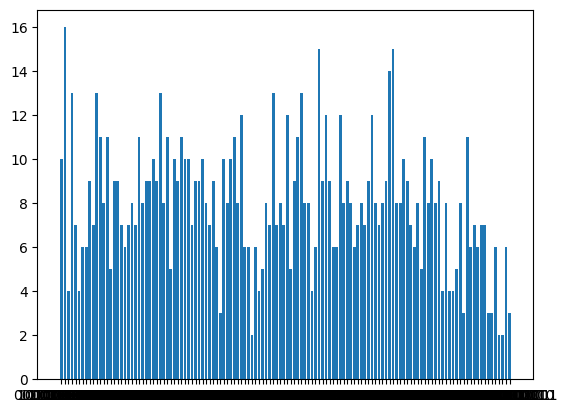

Simulation distribution 1: {'00000011101': 10, '00000010111': 11, '10101010100': 10, '00000000100': 5, '10001010011': 3, '00100011111': 7, '00100000101': 6, '10001001101': 12, '10101011001': 10, '10001010110': 12, '00100011100': 6, '00100000000': 5, '10001001010': 8, '00000000001': 6, '00100010101': 5, '00100001111': 14, '10001000111': 9, '00100001001': 4, '00000011111': 8, '10101000110': 2, '10101011110': 10, '10101011111': 7, '10101000101': 9, '00000001010': 11, '00100010011': 14, '10001000001': 6, '10001011111': 5, '00100011110': 8, '10001010000': 6, '00100000110': 9, '00000000111': 12, '10001010101': 8, '10001001011': 10, '00100000011': 10, '00100010111': 7, '00100001101': 14, '10001000101': 8, '10001011011': 6, '00100000100': 7, '10001010010': 10, '10001001110': 7, '00000000101': 8, '00100010010': 7, '00100001010': 4, '10001000000': 8, '00000010011': 9, '10101010000': 5, '10101001100': 7, '10101001110': 5, '10101010110': 11, '00000010101': 7, '00000000110': 5, '10001001111': 11, '

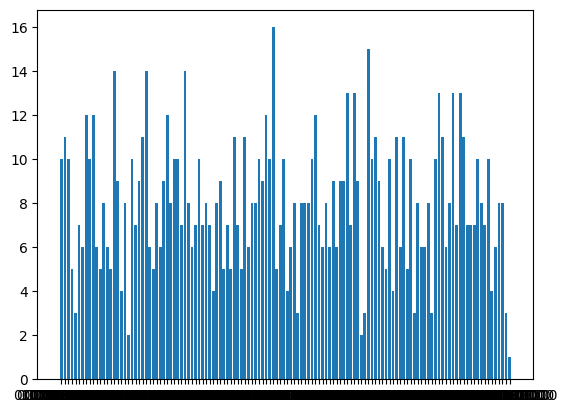

Simulation distribution 2: {'00000010001': 7, '10101010010': 8, '10101001010': 4, '10001010101': 8, '00100000011': 9, '10001001011': 14, '00000000010': 10, '00000000011': 11, '10001010100': 8, '00100000010': 12, '10001001100': 6, '00100011010': 7, '10101011001': 9, '10001000100': 6, '10001011100': 6, '00100001110': 9, '00100010110': 13, '10101000101': 6, '10101011111': 7, '00000011110': 9, '00100001111': 4, '00100010101': 9, '10001000111': 10, '10001010110': 5, '10001001010': 7, '00100000000': 6, '00100011100': 7, '00000000001': 8, '10101011010': 11, '10101000010': 9, '00000011011': 12, '10101010100': 12, '00000010111': 9, '00000001111': 12, '00100010100': 6, '10001011010': 6, '10001000110': 9, '10101001100': 4, '10101010000': 5, '10001011110': 12, '10001000010': 9, '00100010000': 12, '00100001100': 8, '00000001011': 9, '00000011000': 8, '10001000001': 6, '10001011111': 5, '00100010011': 11, '00100001101': 6, '10001011011': 4, '00100010111': 7, '10001000101': 8, '00000001110': 10, '000

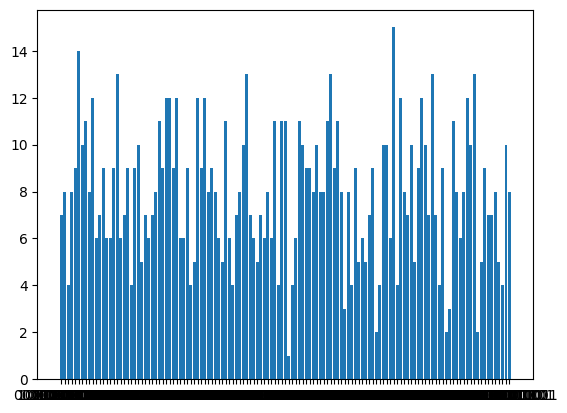

In [30]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()